Premiers exercices

In [6]:
print("Hello world")

Hello world


In [7]:
print("Analyse Bourse")

Analyse Bourse


# Let's go learnging Python

In [8]:
# Ceci est un commentaire dans la cellule de code 
# Python est une programmation orienté OBJET. On définit les variables 
name = "Ajla"
print(name)

# sinon j'appelle la variable 
name

Ajla


'Ajla'

In [9]:
name = "Lucie"
name
# la dernière def de variable l'emporte 

'Lucie'

In [10]:
# Pour les chiffres, on a 
age = 26 #INTEGER donc les nombres entiers 
print(age)

26


In [11]:
pi = 3.14
pi

3.14

In [12]:
# un dictionnaire c'est : clé valeur 
prices = {
    "APPL":248.04,
    "GOOGLE": 328.33,
    "TSLA": 437.43
    
}
prices

{'APPL': 248.04, 'GOOGLE': 328.33, 'TSLA': 437.43}

# Comment avoir des données boursières ?
# En effet, on ne va pas recopier à la main des dictionnaires. 
# Donc on utilise les PACKAGES

In [13]:
! pip install yfinance
#yahoo FINANCE


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [14]:
! pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip


# La structure d'un projet python : 
 Une cellule ou l'on importe tous les PACKAGES
 Comme ça on a une overview des DEPENDANCES
 

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
ticker = "AAPL"

In [25]:
# pour prendre les données du PACKAGE Yfinance on utilise :
# une fonction qui est def dans ce package pour extraire la donnée 

#1. Télecharger les donneés : 
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [26]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.468254,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.763725,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.335556,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,71.995361,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.153503,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...
2026-01-26,255.410004,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,258.269989,261.950012,258.209991,259.170013,49648300


In [27]:
data.head() # fonction pour voir les 5 premières du data set 
data.tail() # et ici les 5 dernières 



Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2026-01-26,255.410004,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,258.269989,261.950012,258.209991,259.170013,49648300
2026-01-28,256.440002,256.440002,258.859985,254.509995,257.649994,41288000
2026-01-29,258.279999,258.279999,259.649994,254.410004,258.000000,67253000
2026-01-30,259.480011,259.480011,261.899994,252.179993,255.169998,92352600


In [29]:
# 2. Calculer les rendements journaliers (Daily Returns)
# On utilise le 'Adj Close' (Prix ajusté aux dividendes/splits)
data['Returns'] = data['Adj Close'].pct_change()



In [21]:
#3. Calculer la volatilité et le rendement moyen (Annualisé)
mean_return_daily = data ['Returns'].mean()
volatility_daily = data['Returns'].std()
annualized_return = mean_return_daily * 252
annualized_volatility = volatility_daily * np.sqrt(252)

In [30]:
#4. Calcul du ratio de sharp (supposon un taux sans risque de 0)
sharpe_ratio = annualized_return / annualized_volatility

print(f"--- Analyse pour {ticker} ---")
print(f"Rendement Annualisé : {annualized_return: .2%}")
print(f"Volatilité Annualisée : {annualized_volatility: .2%}")
print(f"Ratio de Sharpe : {sharpe_ratio: .2f}")

--- Analyse pour AAPL ---
Rendement Annualisé :  26.06%
Volatilité Annualisée :  31.69%
Ratio de Sharpe :  0.82


Text(0.5, 0, 'Date')

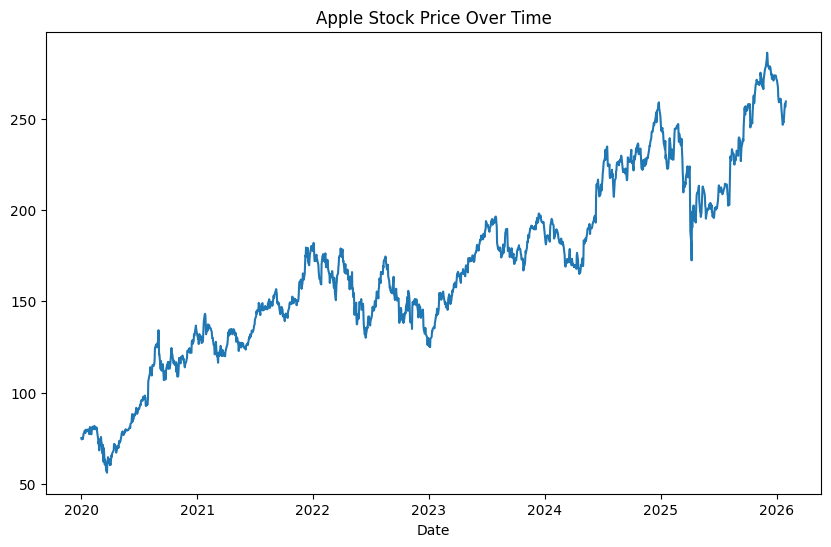

In [35]:
# plot it 
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='AAPL Closing Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')